## sentinel linear search


In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import random
from typing import List, Tuple, Optional

# Load dataset
file_path = r"C:\Users\akip\Desktop\comparation-search-or-sort-algoritm\dummy_transactions_10000.csv"
df = pd.read_csv(file_path)

print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
Shape: (10000, 4)
Columns: ['transaction_id', 'customer_name', 'amount', 'date']

First 5 rows:
  transaction_id  customer_name   amount                        date
0       TX100000    Customer_49  1878.96  2025-10-16 17:00:33.160554
1       TX100001  Customer_1105  4754.06  2025-10-19 17:00:33.160554
2       TX100002   Customer_342  3662.65  2025-11-15 17:00:33.160554
3       TX100003   Customer_232  2997.31  2025-11-19 17:00:33.160554
4       TX100004   Customer_650   788.53  2025-10-24 17:00:33.160554


In [2]:
# Implementasi Sentinel Linear Search
def sentinel_linear_search(arr: List, key, key_attr: str = None) -> Tuple[Optional[int], int]:
    """
    Implementasi Sentinel Linear Search
    
    Args:
        arr: List of elements to search
        key: Value to search for
        key_attr: Attribute name if searching in list of objects
    
    Returns:
        Tuple: (index, comparisons)
    """
    n = len(arr)
    comparisons = 0
    
    # Jika array kosong
    if n == 0:
        return None, comparisons
    
    # Simpan elemen terakhir
    if key_attr:
        last_value = getattr(arr[-1], key_attr)
    else:
        last_value = arr[-1]
    
    # Set sentinel di posisi terakhir
    if key_attr:
        setattr(arr[-1], key_attr, key)
    else:
        arr[-1] = key
    
    i = 0
    # Search tanpa pengecekan batas array
    if key_attr:
        while getattr(arr[i], key_attr) != key:
            comparisons += 1
            i += 1
    else:
        while arr[i] != key:
            comparisons += 1
            i += 1
    
    # Restore elemen terakhir
    if key_attr:
        setattr(arr[-1], key_attr, last_value)
    else:
        arr[-1] = last_value
    
    # Cek apakah elemen ditemukan
    if i < n - 1 or (key_attr and getattr(arr[n-1], key_attr) == key) or (not key_attr and arr[n-1] == key):
        return i, comparisons + 1  # +1 untuk perbandingan terakhir
    
    return None, comparisons + 1

In [3]:
# Implementasi Interpolation Search
def interpolation_search(arr: List, key, key_attr: str = None) -> Tuple[Optional[int], int]:
    """
    Implementasi Interpolation Search
    
    Args:
        arr: List of elements to search (must be sorted)
        key: Value to search for
        key_attr: Attribute name if searching in list of objects
    
    Returns:
        Tuple: (index, comparisons)
    """
    low = 0
    high = len(arr) - 1
    comparisons = 0
    
    while low <= high and key >= (getattr(arr[low], key_attr) if key_attr else arr[low]) and key <= (getattr(arr[high], key_attr) if key_attr else arr[high]):
        comparisons += 1
        
        # Jika low dan high sama
        if (getattr(arr[low], key_attr) if key_attr else arr[low]) == (getattr(arr[high], key_attr) if key_attr else arr[high]):
            if (getattr(arr[low], key_attr) if key_attr else arr[low]) == key:
                return low, comparisons
            return None, comparisons
        
        # Hitung posisi dengan interpolation formula
        pos = low + int(((key - (getattr(arr[low], key_attr) if key_attr else arr[low])) * 
                        (high - low)) / 
                        ((getattr(arr[high], key_attr) if key_attr else arr[high]) - 
                         (getattr(arr[low], key_attr) if key_attr else arr[low])))
        
        comparisons += 1
        current_value = getattr(arr[pos], key_attr) if key_attr else arr[pos]
        
        if current_value == key:
            return pos, comparisons
        elif current_value < key:
            low = pos + 1
        else:
            high = pos - 1
    
    return None, comparisons

In [4]:
# Persiapan Data untuk Testing
# Buat array untuk testing
class Transaction:
    def __init__(self, transaction_id, customer_name, amount, date):
        self.transaction_id = transaction_id
        self.customer_name = customer_name
        self.amount = float(amount)
        self.date = date
    
    def __repr__(self):
        return f"Transaction({self.transaction_id}, {self.customer_name}, {self.amount})"

# Konversi dataframe ke list of Transaction objects
transactions = []
for _, row in df.iterrows():
    transactions.append(Transaction(
        row['transaction_id'],
        row['customer_name'],
        row['amount'],
        row['date']
    ))

# Buat array sorted berdasarkan amount untuk Interpolation Search
sorted_transactions = sorted(transactions, key=lambda x: x.amount)

print(f"Total transactions: {len(transactions)}")
print(f"Sample sorted amounts: {[t.amount for t in sorted_transactions[:5]]}")

Total transactions: 10000
Sample sorted amounts: [10.06, 10.15, 10.26, 10.67, 11.13]


In [5]:

# Fungsi Testing dan Pengukuran Performa
def test_search_algorithms(search_keys: List[float]) -> pd.DataFrame:
    """
    Test kedua algoritma dengan berbagai key
    """
    results = []
    
    for key in search_keys:
        # Test Sentinel Linear Search
        start_time = time.time()
        sentinel_idx, sentinel_comparisons = sentinel_linear_search(
            transactions.copy(), key, 'amount'
        )
        sentinel_time = time.time() - start_time
        
        # Test Interpolation Search
        start_time = time.time()
        interpolation_idx, interpolation_comparisons = interpolation_search(
            sorted_transactions.copy(), key, 'amount'
        )
        interpolation_time = time.time() - start_time
        
        results.append({
            'search_key': key,
            'sentinel_found': sentinel_idx is not None,
            'sentinel_comparisons': sentinel_comparisons,
            'sentinel_time': sentinel_time,
            'interpolation_found': interpolation_idx is not None,
            'interpolation_comparisons': interpolation_comparisons,
            'interpolation_time': interpolation_time
        })
    
    return pd.DataFrame(results)

# Pilih beberapa key untuk testing
search_keys = [
    random.choice(transactions).amount,  # Random existing amount
    1000.0,  # Nilai di tengah range
    5000.0,  # Nilai mendekati maksimum
    100.0,   # Nilai mendekati minimum
    2500.0   # Nilai di tengah
]

print("Testing dengan keys:", search_keys)
results_df = test_search_algorithms(search_keys)
print(results_df)

Testing dengan keys: [4666.69, 1000.0, 5000.0, 100.0, 2500.0]
   search_key  sentinel_found  sentinel_comparisons  sentinel_time  \
0     4666.69            True                  3699       0.000000   
1     1000.00           False                 10000       0.001035   
2     5000.00           False                 10000       0.001014   
3      100.00           False                 10000       0.000000   
4     2500.00           False                 10000       0.000000   

   interpolation_found  interpolation_comparisons  interpolation_time  
0                 True                          8            0.000000  
1                False                          8            0.000000  
2                False                          0            0.000000  
3                False                          6            0.001503  
4                False                         10            0.000000  


In [6]:
# Analisis Kompleksitas Waktu dan Ruang
def analyze_complexity():
    """
    Analisis kompleksitas waktu dan ruang untuk kedua algoritma
    """
    print("=" * 60)
    print("ANALISIS KOMPLEKSITAS ALGORITMA")
    print("=" * 60)
    
    print("\n1. SENTINEL LINEAR SEARCH")
    print("Kompleksitas Waktu:")
    print("- Worst-case: O(n)")
    print("- Best-case: O(1) - elemen di posisi pertama")
    print("- Average-case: O(n)")
    print("\nKompleksitas Ruang: O(1) - hanya menggunakan variabel tambahan")
    
    print("\n2. INTERPOLATION SEARCH")
    print("Kompleksitas Waktu:")
    print("- Worst-case: O(n) - ketika distribusi tidak uniform")
    print("- Best-case: O(1) - elemen tepat di posisi interpolasi")
    print("- Average-case: O(log log n) untuk distribusi uniform")
    print("\nKompleksitas Ruang: O(1) - iterative implementation")
    
    print("\n3. PERBANDINGAN:")
    print("Sentinel Linear Search lebih baik untuk:")
    print("- Data tidak terurut")
    print("- Data berukuran kecil")
    print("- Pencarian jarang dilakukan")
    
    print("\nInterpolation Search lebih baik untuk:")
    print("- Data terurut dan terdistribusi uniform")
    print("- Data berukuran besar")
    print("- Pencarian sering dilakukan")

analyze_complexity()

ANALISIS KOMPLEKSITAS ALGORITMA

1. SENTINEL LINEAR SEARCH
Kompleksitas Waktu:
- Worst-case: O(n)
- Best-case: O(1) - elemen di posisi pertama
- Average-case: O(n)

Kompleksitas Ruang: O(1) - hanya menggunakan variabel tambahan

2. INTERPOLATION SEARCH
Kompleksitas Waktu:
- Worst-case: O(n) - ketika distribusi tidak uniform
- Best-case: O(1) - elemen tepat di posisi interpolasi
- Average-case: O(log log n) untuk distribusi uniform

Kompleksitas Ruang: O(1) - iterative implementation

3. PERBANDINGAN:
Sentinel Linear Search lebih baik untuk:
- Data tidak terurut
- Data berukuran kecil
- Pencarian jarang dilakukan

Interpolation Search lebih baik untuk:
- Data terurut dan terdistribusi uniform
- Data berukuran besar
- Pencarian sering dilakukan


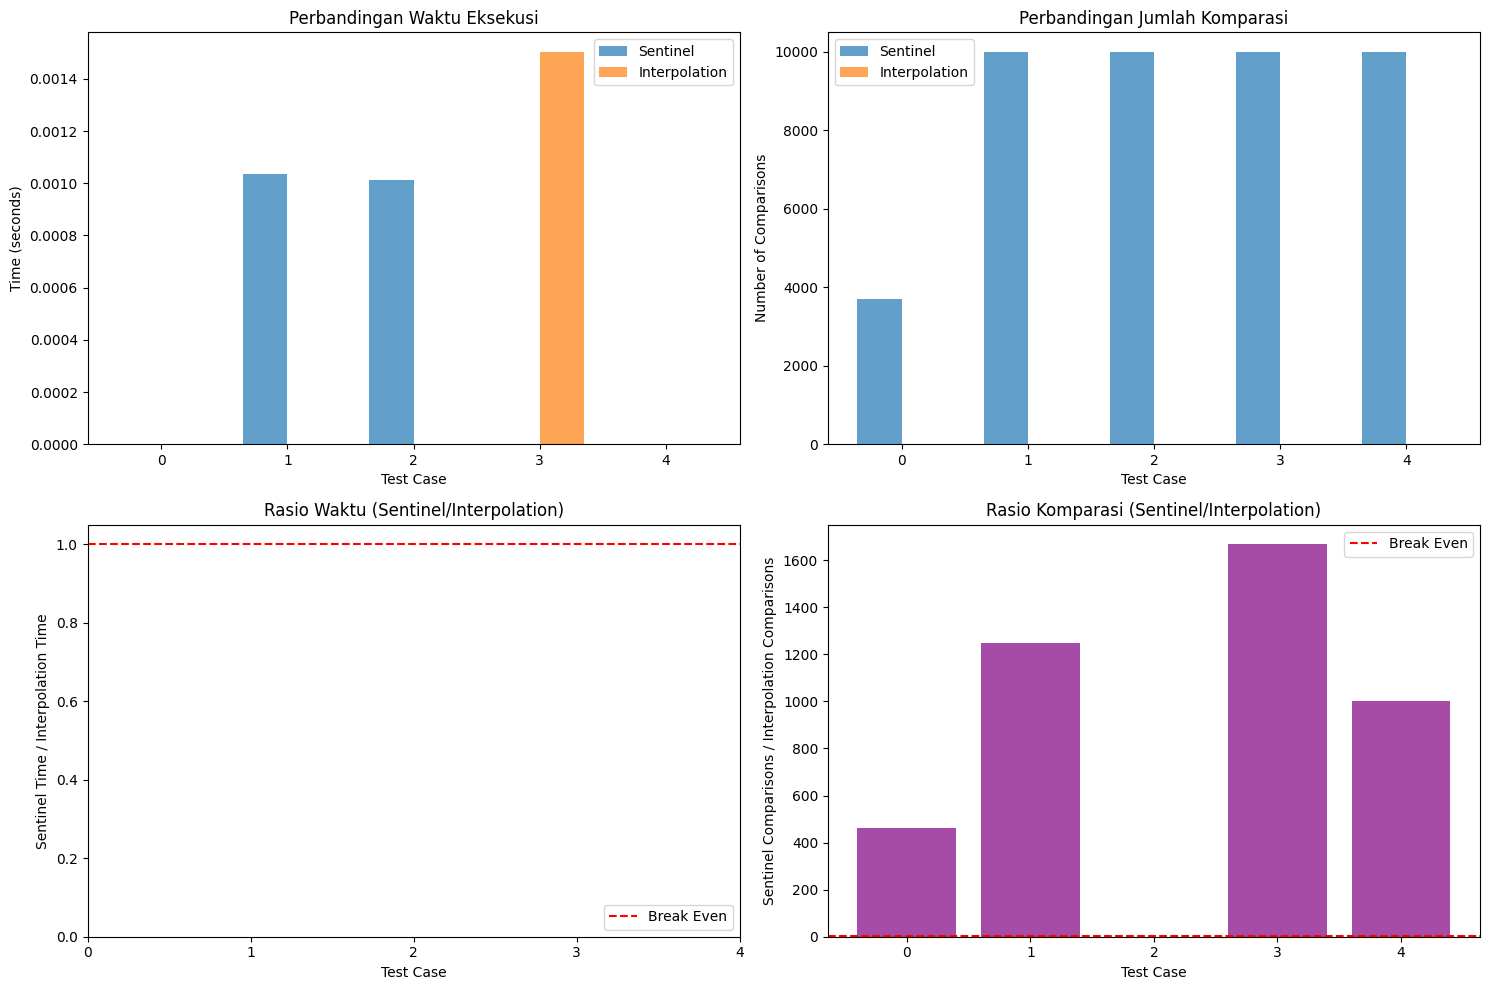

In [7]:
# Visualisasi Hasil
def visualize_results(results_df: pd.DataFrame):
    """
    Visualisasi perbandingan performa kedua algoritma
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # Perbandingan waktu
    x = range(len(results_df))
    width = 0.35
    
    ax1.bar([i - width/2 for i in x], results_df['sentinel_time'], width, label='Sentinel', alpha=0.7)
    ax1.bar([i + width/2 for i in x], results_df['interpolation_time'], width, label='Interpolation', alpha=0.7)
    ax1.set_xlabel('Test Case')
    ax1.set_ylabel('Time (seconds)')
    ax1.set_title('Perbandingan Waktu Eksekusi')
    ax1.legend()
    ax1.set_xticks(x)
    
    # Perbandingan jumlah komparasi
    ax2.bar([i - width/2 for i in x], results_df['sentinel_comparisons'], width, label='Sentinel', alpha=0.7)
    ax2.bar([i + width/2 for i in x], results_df['interpolation_comparisons'], width, label='Interpolation', alpha=0.7)
    ax2.set_xlabel('Test Case')
    ax2.set_ylabel('Number of Comparisons')
    ax2.set_title('Perbandingan Jumlah Komparasi')
    ax2.legend()
    ax2.set_xticks(x)
    
    # Rasio waktu
    time_ratio = results_df['sentinel_time'] / results_df['interpolation_time']
    ax3.bar(x, time_ratio, color='green', alpha=0.7)
    ax3.axhline(y=1, color='red', linestyle='--', label='Break Even')
    ax3.set_xlabel('Test Case')
    ax3.set_ylabel('Sentinel Time / Interpolation Time')
    ax3.set_title('Rasio Waktu (Sentinel/Interpolation)')
    ax3.legend()
    ax3.set_xticks(x)
    
    # Rasio komparasi
    comp_ratio = results_df['sentinel_comparisons'] / results_df['interpolation_comparisons']
    ax4.bar(x, comp_ratio, color='purple', alpha=0.7)
    ax4.axhline(y=1, color='red', linestyle='--', label='Break Even')
    ax4.set_xlabel('Test Case')
    ax4.set_ylabel('Sentinel Comparisons / Interpolation Comparisons')
    ax4.set_title('Rasio Komparasi (Sentinel/Interpolation)')
    ax4.legend()
    ax4.set_xticks(x)
    
    plt.tight_layout()
    plt.show()

visualize_results(results_df)

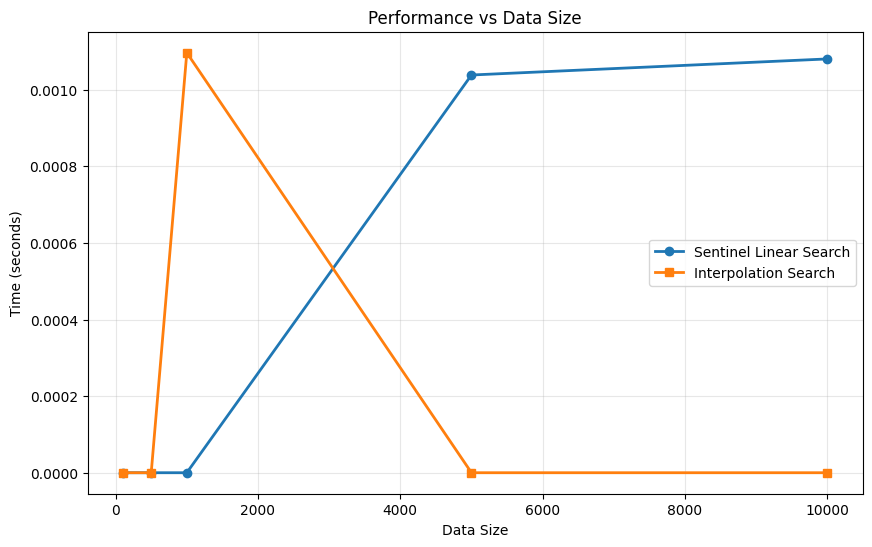

In [8]:
# Testing dengan Skala Data Berbeda
def test_with_different_sizes():
    """
    Test performa dengan berbagai ukuran data
    """
    sizes = [100, 500, 1000, 5000, 10000]
    sentinel_times = []
    interpolation_times = []
    
    for size in sizes:
        # Sample data dengan ukuran tertentu
        sample_data = random.sample(transactions, size)
        sorted_sample = sorted(sample_data, key=lambda x: x.amount)
        
        # Pilih key random untuk search
        test_key = random.choice(sample_data).amount
        
        # Test Sentinel
        start_time = time.time()
        sentinel_linear_search(sample_data.copy(), test_key, 'amount')
        sentinel_times.append(time.time() - start_time)
        
        # Test Interpolation
        start_time = time.time()
        interpolation_search(sorted_sample.copy(), test_key, 'amount')
        interpolation_times.append(time.time() - start_time)
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, sentinel_times, 'o-', label='Sentinel Linear Search', linewidth=2)
    plt.plot(sizes, interpolation_times, 's-', label='Interpolation Search', linewidth=2)
    plt.xlabel('Data Size')
    plt.ylabel('Time (seconds)')
    plt.title('Performance vs Data Size')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return sizes, sentinel_times, interpolation_times

sizes, sentinel_t, interpolation_t = test_with_different_sizes()

In [9]:
# Kesimpulan dan Rekomendasi
def print_conclusions():
    """
    Menampilkan kesimpulan dari analisis
    """
    print("=" * 60)
    print("KESIMPULAN DAN REKOMENDASI")
    print("=" * 60)
    
    print("\nBerdasarkan analisis kompleksitas dan pengujian:")
    
    print("\n✅ SENTINEL LINEAR SEARCH:")
    print("   Kelebihan:")
    print("   - Tidak memerlukan data terurut")
    print("   - Implementasi sederhana")
    print("   - Efisien untuk data kecil")
    print("   Kekurangan:")
    print("   - O(n) untuk kasus rata-rata")
    print("   - Tidak efisien untuk data besar")
    
    print("\n✅ INTERPOLATION SEARCH:")
    print("   Kelebihan:")
    print("   - Sangat efisien O(log log n) untuk data uniform")
    print("   - Optimal untuk data terurut besar")
    print("   Kekurangan:")
    print("   - Memerlukan data terurut")
    print("   - Performa buruk untuk data tidak uniform")
    print("   - Implementasi lebih kompleks")
    
    print("\n🎯 REKOMENDASI:")
    print("   Gunakan SENTINEL LINEAR SEARCH ketika:")
    print("   - Data tidak terurut atau sering berubah")
    print("   - Ukuran data kecil hingga menengah")
    print("   - Implementasi sederhana diutamakan")
    
    print("\n   Gunakan INTERPOLATION SEARCH ketika:")
    print("   - Data sudah terurut dan distribusi uniform")
    print("   - Ukuran data besar")
    print("   - Pencarian dilakukan berulang kali")
    
    # Hitung average performance dari test terakhir
    avg_sentinel = np.mean(results_df['sentinel_time'])
    avg_interpolation = np.mean(results_df['interpolation_time'])
    
    print(f"\n📊 HASIL PENGUJIAN:")
    print(f"   Rata-rata waktu Sentinel: {avg_sentinel:.6f} detik")
    print(f"   Rata-rata waktu Interpolation: {avg_interpolation:.6f} detik")
    print(f"   Speedup: {avg_sentinel/avg_interpolation:.2f}x")

print_conclusions()

KESIMPULAN DAN REKOMENDASI

Berdasarkan analisis kompleksitas dan pengujian:

✅ SENTINEL LINEAR SEARCH:
   Kelebihan:
   - Tidak memerlukan data terurut
   - Implementasi sederhana
   - Efisien untuk data kecil
   Kekurangan:
   - O(n) untuk kasus rata-rata
   - Tidak efisien untuk data besar

✅ INTERPOLATION SEARCH:
   Kelebihan:
   - Sangat efisien O(log log n) untuk data uniform
   - Optimal untuk data terurut besar
   Kekurangan:
   - Memerlukan data terurut
   - Performa buruk untuk data tidak uniform
   - Implementasi lebih kompleks

🎯 REKOMENDASI:
   Gunakan SENTINEL LINEAR SEARCH ketika:
   - Data tidak terurut atau sering berubah
   - Ukuran data kecil hingga menengah
   - Implementasi sederhana diutamakan

   Gunakan INTERPOLATION SEARCH ketika:
   - Data sudah terurut dan distribusi uniform
   - Ukuran data besar
   - Pencarian dilakukan berulang kali

📊 HASIL PENGUJIAN:
   Rata-rata waktu Sentinel: 0.000410 detik
   Rata-rata waktu Interpolation: 0.000301 detik
   Speedup: 